<a href="https://colab.research.google.com/github/savindumahasen/Skin-Disease-Classification-Project/blob/main/Skin_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## install the necessary libraries
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q
!pip install opendatasets -q

In [3]:
## Import the necessary libraries
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [4]:
## download the dataset
od.download("https://www.kaggle.com/datasets/pritpal2873/multiple-skin-disease-detection-and-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: savinduruhunuhewa
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/pritpal2873/multiple-skin-disease-detection-and-classification


100%|██████████| 785M/785M [00:05<00:00, 164MB/s]

In [5]:
## Define the batch size and image size
BATCH_SIZE=32
IMAGE_SIZE=(128,128)

In [6]:
## Load the dataset and split into train and test set

skin_cancer_dataset = "/content/multiple-skin-disease-detection-and-classification/Skin Cancer Dataset/"

train_set=tf.keras.utils.image_dataset_from_directory(skin_cancer_dataset ,
                                                    batch_size=BATCH_SIZE,
                                                    image_size=IMAGE_SIZE,
                                                    subset='training',
                                                    validation_split=0.2,
                                                    seed=42)

## this  validation  set treated as test set
test_set=tf.keras.utils.image_dataset_from_directory(skin_cancer_dataset,
                                                         subset='validation',
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         validation_split=0.2,
                                                         seed=42)





Found 4107 files belonging to 9 classes.
Using 3286 files for training.
Found 4107 files belonging to 9 classes.
Using 821 files for validation.


In [7]:
## Get the target values

class_names=train_set.class_names
class_names

['Acitinic Keratosis',
 'Basal Cell Carcinoma',
 'Dermatofibroma',
 'Melanoma',
 'Nevus',
 'Pigmented Benign Keratosis',
 'Seborrheic Keratosis',
 'Squamous Cell Carcinoma',
 'Vascular Lesion']

In [8]:
## Look at the one batch
for image_size, label_batch in train_set.take(1):
  print(image_size.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


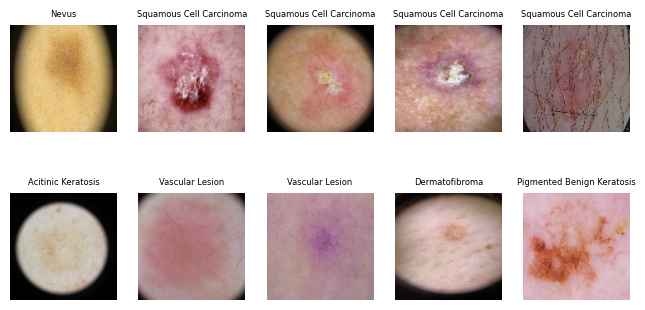

In [17]:
## Plot the training set sample

plt.figure(figsize=(8,4))
for image,label in train_set.take(1):
  for i in range(10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]], fontsize=6)
    plt.axis('off')

In [18]:
## Look at the images pixal values by taking one batch
for image, label in train_set.take(1):
  print(image)

tf.Tensor(
[[[[2.92187500e+00 9.21875000e-01 1.92187500e+00]
   [4.34375000e+00 2.54687500e+00 9.37500000e-01]
   [8.39062500e+00 4.39062500e+00 1.39062500e+00]
   ...
   [2.57812500e+00 1.57812500e+00 0.00000000e+00]
   [5.48437500e+00 2.23437500e+00 0.00000000e+00]
   [2.76562500e+00 1.76562500e+00 0.00000000e+00]]

  [[5.59375000e+00 1.59375000e+00 2.59375000e+00]
   [8.25000000e+00 4.25000000e+00 5.25000000e+00]
   [1.14375000e+01 5.43750000e+00 6.59375000e+00]
   ...
   [3.00000000e+00 1.00000000e+00 2.00000000e+00]
   [3.00000000e+00 1.00000000e+00 2.00000000e+00]
   [1.00000000e+00 0.00000000e+00 0.00000000e+00]]

  [[9.00000000e+00 5.00000000e+00 5.65625000e+00]
   [8.82812500e+00 3.82812500e+00 8.28125000e-01]
   [7.35937500e+00 2.50000000e+00 7.65625000e-01]
   ...
   [2.00000000e+00 0.00000000e+00 1.00000000e+00]
   [2.00000000e+00 2.00000000e+00 2.00000000e+00]
   [3.00000000e+00 2.00000000e+00 0.00000000e+00]]

  ...

  [[2.00000000e+00 2.00000000e+00 2.00000000e+00]
   [3

In [19]:
## Normalize the  train and test dataset
train_set_new=train_set.map(lambda x,y:(x/255,y))
test_set_new=test_set.map(lambda x,y:(x/255,y))